# STA365 HW2
Name: Dohyun Kim

Student number: 1007372843

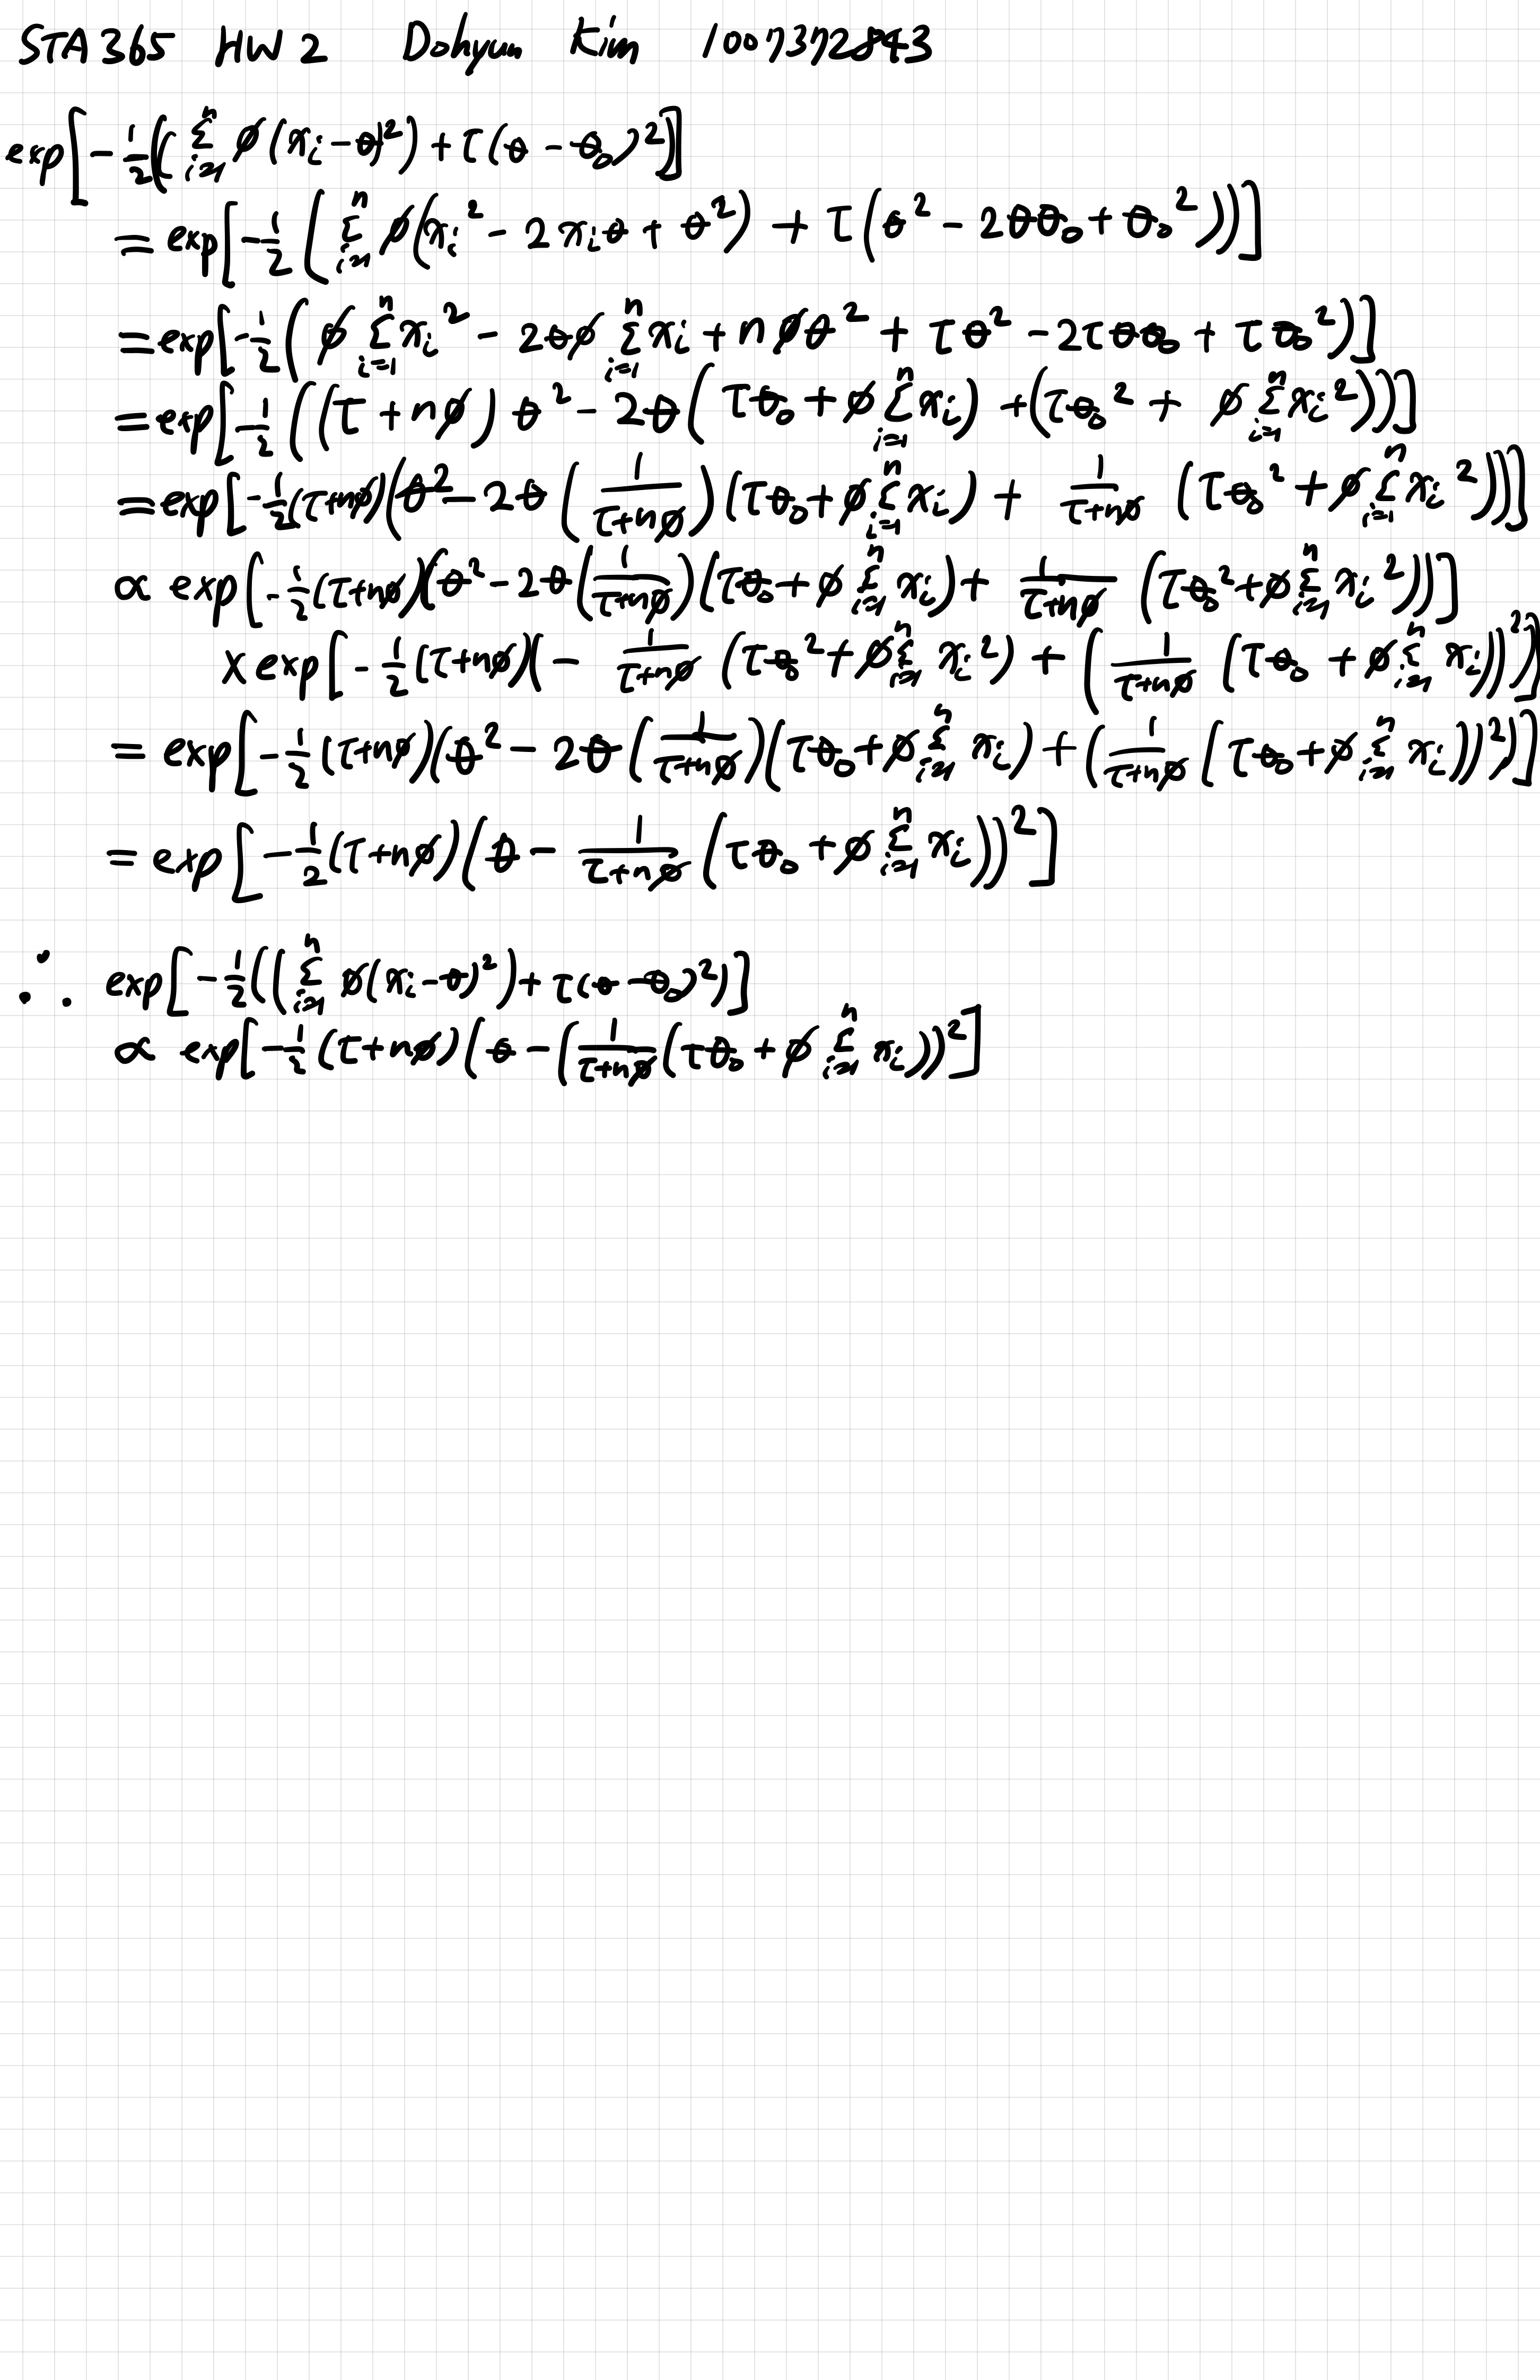

## Part 2

Text(0.5, 1.0, 'Visualize various priors, likelihoods, posteriors, and joint distribution (which is proportional to posterior)')

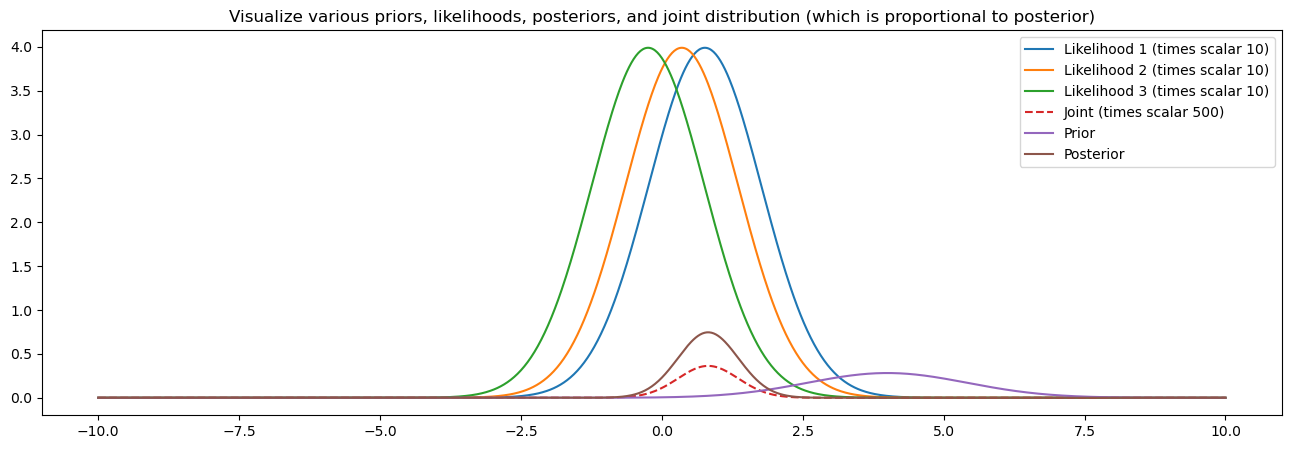

In [24]:
# 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
likelihood = []
for i in range(n):
    likelihood.append(stats.norm.pdf(([x[i]])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1))
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c,c2 = 500,10
joint = c*np.array(likelihood).prod(axis=0)*prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(16,5))
for i in range(n):
    plt.plot(parameter_domain, c2*likelihood[i], label="Likelihood "+str(i+1)+" (times scalar "+str(c2)+")")
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar "+str(c)+")")
plt.plot(parameter_domain, prior, label="Prior")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors, and joint distribution (which is proportional to posterior)")

Text(0.5, 1.0, 'Visualize various log priors, log likelihoods, log posteriors, and log joint distribution')

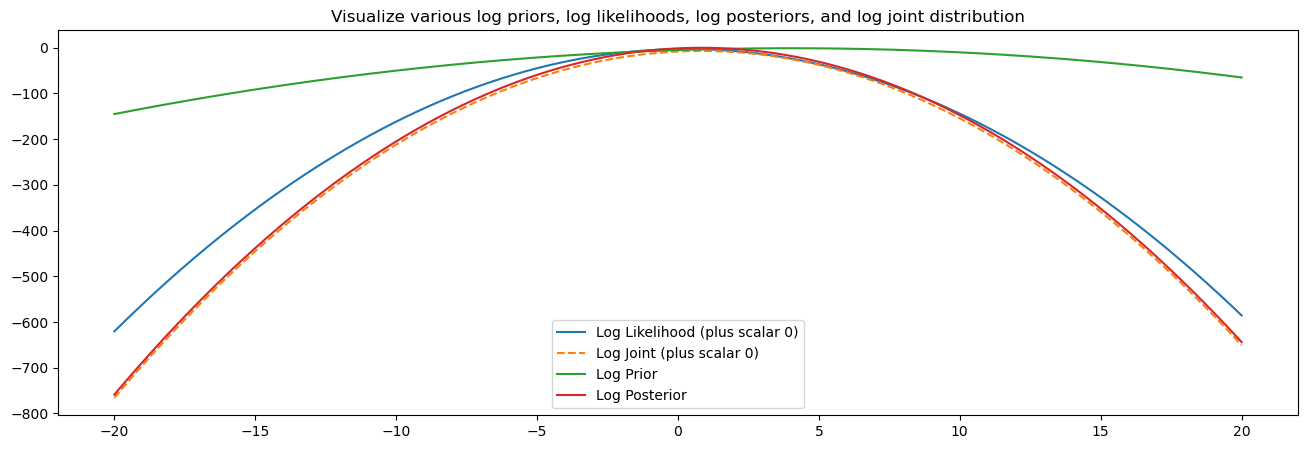

In [44]:
# 2
c3,c4 = 0,0
log_parameter_domain = np.linspace(-20,20,2001)
loglikelihood = np.sum(stats.norm.logpdf((x[:,np.newaxis])*np.ones(log_parameter_domain.shape), 
                            loc=log_parameter_domain, scale=1), axis=0)
logprior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(log_parameter_domain)
logjoint = c3 + loglikelihood + logprior
logposterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(log_parameter_domain)

plt.figure(figsize=(16,5))
plt.plot(log_parameter_domain, c4 + loglikelihood, label="Log Likelihood (plus scalar "+str(c4)+")")
plt.plot(log_parameter_domain, logjoint, linestyle="--", label="Log Joint (plus scalar "+str(c3)+")")
plt.plot(log_parameter_domain, logprior, label="Log Prior")
plt.plot(log_parameter_domain, logposterior, label="Log Posterior")
plt.legend()
plt.title("Visualize various log priors, log likelihoods, log posteriors, and log joint distribution")

3.

The posterior distribution of a normal likelihood with $p(\theta) \propto 1$ is normal. It is because the posterior distribution is proportional to the joint distribution, which is the likelihood (which is a normal distribution) times the prior ($p(\theta) \propto 1$).


4.

The difference between likelihood and posterior when prior is improper, is the log of marginal likelihood. It is because $\text{posterior} = \frac{\text{likelihood} \times \text{prior}}{\text{marginal likelihood}} \propto \frac{\text{likelihood}}{\text{marginal likelihood}}$ (since $p(\theta) \propto 1$) and $\log(\text{posterior}) = \log(\frac{\text{likelihood}}{\text{marginal likelihood}}) = \log(\text{likelihood}) - \log(\text{marginal likelihood})$ 

Likelihood is a proper distribution with the area under the curve equals 1, but posterior might not be a proper distribution, i.e. the area under the curve might not equal to 1. It is because the marginal likelihood constant, which is the integration over likelihood times prior with respect to $\theta$ and acts as normalizing constant for the posterior distribution, with improper prior might not be finite. However in case of normal likelihood and prior $p(\theta) \propto 1$ where $\theta = \mu$, the marginal likelihood constant is finite and the posterior is proper normal distribution.